In [1]:
import pandas as pd
import numpy as np


In [3]:
zoo=pd.read_csv(r"C:\Users\manda\OneDrive\Desktop\Data Science\Machine learning assignment\KNN\Zoo.csv")

In [4]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [12]:
zoo1=zoo.drop('animal name',axis=1)

In [13]:
zoo1.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [19]:
X=zoo1.iloc[:,:-1]
Y=zoo1.iloc[:,-1]

In [21]:
# lets split the data
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler=StandardScaler()

In [33]:
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)

In [24]:
# model building
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn=KNeighborsClassifier()

In [34]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [36]:
ypred=knn.predict(x_test)

In [38]:
ypred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4, 5,
       3, 6, 1, 7, 6, 3, 1, 1, 2], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(ypred,y_test)

0.9032258064516129

In [43]:
# lets try different k value
score=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    ypred=knn.predict(x_test)
    score.append(accuracy_score(ypred,y_test))
    
    

In [44]:
score

[0.9032258064516129,
 0.8387096774193549,
 0.8709677419354839,
 0.9354838709677419,
 0.9032258064516129,
 0.8709677419354839,
 0.7741935483870968,
 0.7741935483870968,
 0.7419354838709677,
 0.7419354838709677,
 0.7096774193548387,
 0.7419354838709677,
 0.7419354838709677,
 0.7419354838709677,
 0.7419354838709677,
 0.7419354838709677,
 0.7096774193548387,
 0.7096774193548387,
 0.7096774193548387]

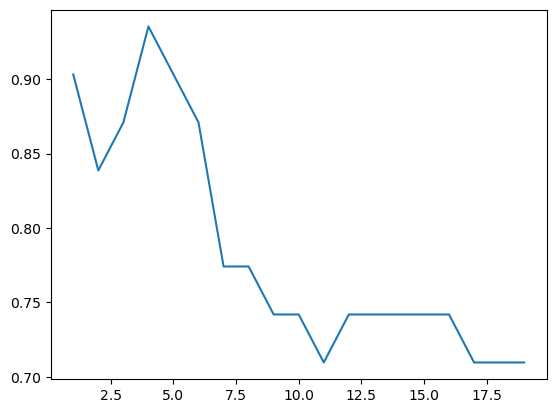

In [47]:
# lets visualise the accuracy scores with respect k value
import matplotlib.pyplot as plt
plt.plot(range(1,20),score)

In [48]:
# we can clearly see that at k=4 we get highest accuracy so will go with k=4

In [49]:
# lets create model with k=4
final_model=KNeighborsClassifier(n_neighbors=4)

In [50]:
final_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [51]:
y_pred=final_model.predict(x_test)

In [54]:
final_accuracy=accuracy_score(y_pred,y_test)

In [55]:
final_accuracy

0.9354838709677419

# Final accuracy of model is 0.9354

### we can see that as value of 'k' increases the underfitting condition arise